# Hello World Jupyter Notebook

Jupyter Notebook is a software which allows to execute pieces of code interactively in the browser. This file gives an overview of its capabilities tailored towards the setting of this workshop.

At first, get the reqired imports out of the way. In the workshop most likely only `import mll.*` will be required.

In [1]:
import mll.*;
import java.io.File;
import java.io.IOException;
import java.nio.file.Paths;

import guru.nidi.graphviz.engine.Format;
import guru.nidi.graphviz.engine.Graphviz;

## Function Plotting

It is possible to plot functions with ease. Simply define two arrays of input and output values respectively. Then, pass these onto a plot generation function provided by us.

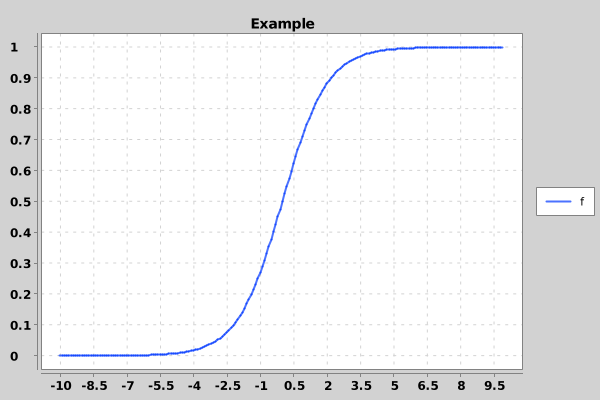

In [2]:
int min = -10;
int max = 10;
float stepsize = .1f;
int length = (int) ((max - min) / stepsize);
float[] xValues = new float[length];
float[] yValues = new float[length];
for (int i = 0; i < length; i++) {
  float x = min + stepsize * i;
  xValues[i] = x;
  yValues[i] = (float) (1 / (1 + Math.exp(-x)));
}

MLLRunner.viewFunctionPlot(xValues, yValues, "Example");

## Graph Plotting

Similarly, it is also possible to visualize graphs. Note that we will provide an utility function for this during the workshop to make this even easier (`MLLRunner.viewDot`).

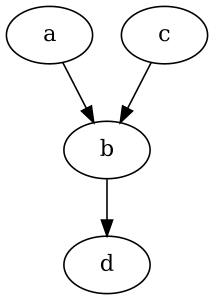

In [3]:
// 2) Plot graph
String dot = """
    digraph g {
        a -> b 
        c -> b 
        b -> d
    }
    """;

// There will be a utility function for this in the workshop (MLLRunner.viewDot).
Graphviz.fromString(dot)
    .height(300)
    .render(Format.PNG)
    .toImage();

## Execute LLVM

You can run any LLVM program (which has a main function) directly in the Notebook and receive the output below.

In [4]:
// 3) Compile LLVM
MLLRunner.runLLVM("helloworld");

Hello from LLVM!


## Optimize LLVM Programs

LLVM programs can be optimized using the `opt` command provided by the `llvm` package. This command is provided to you for direct usage.

In [5]:
// 4) Optimize LLVM code
String opt = MLLRunner.saveOpt("helloworld", 3);
System.out.println("Optimzed program saved as: " + opt);

Optimzed program saved as: llvm/helloworld-O3.ll
